<a href="https://colab.research.google.com/github/DikshitaNikam/Deep-Learning/blob/main/Regmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression in Keras

### Step 1 - Data Ingestion

In [ ]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [ ]:
import pandas as pd
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target feature is PE - Power Plant energy op in MW
1. AT - Atmospheric Temperature degree Celsius
2. V - Vaccum Pressure Boiler
3. AP - Atmospheric Pressure
4. RH - Relative Humidity

## Step 2 - Perform Basic data quality checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.duplicated().sum()

np.int64(41)

In [ ]:
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.shape

(9527, 5)

## Step 3 - Separate X and Y (PE)

In [ ]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Step 4 - Apply Preprocessing on X

In [ ]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


## Step 5 - Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)


In [ ]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

In [ ]:
xtrain.shape[1]

4

## Step 6 - Build neural network with tensorflow keras

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
model  = Sequential(
    [
        Input(shape= (xtrain.shape[1],) ),
        Dense(8, activation="relu"),
        Dense(4, activation="relu"),
        Dense(1, activation="linear")
    ]
)

In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(loss="mse", optimizer="adam", metrics=["mae"])

In [ ]:
# Fit the model
hist = model.fit(xtrain, ytrain, epochs=60, validation_split=0.2)

Epoch 1/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 206818.2188 - mae: 454.4438 - val_loss: 203693.5938 - val_mae: 450.9570
Epoch 2/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203279.4062 - mae: 450.4839 - val_loss: 194466.6250 - val_mae: 440.4023
Epoch 3/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 190949.3594 - mae: 436.1794 - val_loss: 168419.2031 - val_mae: 408.2005
Epoch 4/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 161710.2969 - mae: 398.6651 - val_loss: 125662.8047 - val_mae: 344.0943
Epoch 5/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120236.9375 - mae: 333.3432 - val_loss: 87246.8984 - val_mae: 267.3810
Epoch 6/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 84862.6172 - mae: 264.0812 - val_loss: 61158.7461 - val_mae: 218.8551
Epoch 7/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 58404.2930 - mae: 213.8647 - val_loss: 40812.8438 - val_mae: 179.1939
Epoch 8/60
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 38687.0078 - mae: 175

## Visualize learining curve

In [ ]:
import matplotlib.pyplot as plt


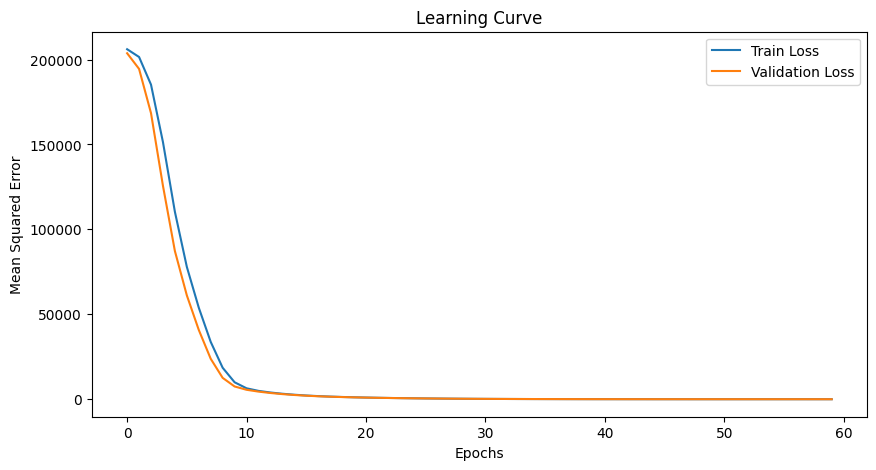

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Model trained properly as train and validation loss curves are moving together

## Model Evaluation

In [ ]:
model.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 20.3939 - mae: 3.5256


[20.732620239257812, 3.5191314220428467]

In [ ]:
model.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 20.7760 - mae: 3.4948


[21.603235244750977, 3.5699775218963623]

In [ ]:
from sklearn.metrics import (
    root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
)

In [ ]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [ ]:
print("Training Results")
evaluate_model(model, xtrain, ytrain)

Training Results
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.55
MAE : 3.52
MAPE : 0.77%
R2 : 92.79%


In [ ]:
print("Testing Results")
evaluate_model(model, xtest, ytest)

Testing Results
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE : 4.65
MAE : 3.57
MAPE : 0.78%
R2 : 92.84%


## From above data model is good beacause R2 score > 0.8
 ## Out of sample predication

In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [ ]:
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908
...,...,...,...,...
95,0.898948,1.197147,-0.805877,-0.196139
96,-1.058331,-1.129893,-0.314313,0.658261
97,-1.885843,-1.017956,1.291690,0.881445
98,0.712221,1.631496,-0.839546,0.491899


In [ ]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[444.64548],
       [437.4624 ],
       [431.37448],
       [439.16263],
       [473.99048]], dtype=float32)

In [ ]:
xnew["PE_pred"] = preds

In [ ]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,444.645477
1,28.88,54.89,1007.16,46.60,437.462402
2,27.89,73.21,1001.32,85.88,431.374481
3,25.69,62.26,1011.38,74.08,439.162628
4,12.16,40.81,1025.79,70.97,473.990479
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.047211
96,11.78,39.96,1011.37,82.95,471.015472
97,5.62,41.38,1020.91,86.21,484.018951
98,24.96,74.99,1008.25,80.52,436.124786


In [ ]:
xnew = xnew.round(2)

In [ ]:
xnew.to_csv("RegResults.csv", index=False)

## Save the model

In [ ]:

import joblib
joblib.dump(num_pipe, "regpre.joblib")

['regpre.joblib']

In [ ]:
model.save("regmodel.keras")

## Load Preprocessor and model

In [ ]:
p = joblib.load("regpre.joblib")

In [ ]:
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
from keras.models import load_model

In [ ]:

m = load_model("regmodel.keras")

In [ ]:

m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)